In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import fitz  # PyMuPDF
import uuid # for generating unique identifiers for each paper

In [4]:
# Base path to folder where output files will be stored
output_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/finals'

# Base path to folders 
base_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/'

# Path to the MICCAI 2023 pdfs
pdf_path = base_path + 'miccai_2023/'

# Path to the MICCAI 2023 database of all 730 papers and their metadata
database_path = base_path + 'databases/'

In [6]:
def save_to_csv(df, path, title):
    df.to_csv(path + title + '.csv', index=True)

In [1]:
filename_agg_binary_df = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/finals/agg_columns_binary_values.csv'
filename_agg_counts_df = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/finals/agg_counts.csv'
filename_keyword_counts_df = '//Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/finals/keyword_counts.csv'

In [5]:
binary_df = pd.read_csv(filename_agg_binary_df)
binary_df.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
binary_df

,title,age_,gender_,geolocation_,social factors,etnicity_,bias_,fairness_
0,3D Arterial Segmentation via Single 2D Project...,0,1,0,0,0,0,1
1,3D Dental Mesh Segmentation Using Semantics-Ba...,0,0,0,0,0,0,1
2,3D Medical Image Segmentation with Sparse Anno...,0,0,0,0,0,0,1
3,3D Mitochondria Instance Segmentation with Spa...,1,1,1,0,0,0,1
4,3D Teeth Reconstruction from Panoramic Radiogr...,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...
184,Deep Unsupervised Clustering for Conditional I...,0,0,0,0,0,1,0
185,DeepGraphDMD: Interpretable Spatio-Temporal De...,1,0,1,0,0,0,1
186,DeepSOZ: A Robust Deep Model for Joint Tempora...,0,0,0,0,0,0,1
187,Democratizing Pathological Image Segmentation ...,0,0,0,0,0,0,1


In [6]:
agg_counts_df = pd.read_csv(filename_agg_counts_df)
agg_counts_df.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
agg_counts_df

,title,age_,gender_,geolocation_,social factors,etnicity_,bias_,fairness_
0,3D Arterial Segmentation via Single 2D Project...,0,3,0,0,0,0,3
1,3D Dental Mesh Segmentation Using Semantics-Ba...,0,0,0,0,0,0,2
2,3D Medical Image Segmentation with Sparse Anno...,0,0,0,0,0,0,1
3,3D Mitochondria Instance Segmentation with Spa...,1,3,1,0,0,0,1
4,3D Teeth Reconstruction from Panoramic Radiogr...,1,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...
184,Deep Unsupervised Clustering for Conditional I...,0,0,0,0,0,6,0
185,DeepGraphDMD: Interpretable Spatio-Temporal De...,1,0,1,0,0,0,6
186,DeepSOZ: A Robust Deep Model for Joint Tempora...,0,0,0,0,0,0,1
187,Democratizing Pathological Image Segmentation ...,0,0,0,0,0,0,2


In [7]:
keyword_counts_df = pd.read_csv(filename_keyword_counts_df)
keyword_counts_df.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
keyword_counts_df

,title,age,gender,sex,women,woman,female,male,geolocation,geographical,...,bias,biases,fair,unfair,fairness,transparency,imbalance,imbalanced,balance,balanced
0,3D Arterial Segmentation via Single 2D Project...,0,0,0,0,0,1,2,0,0,...,0,0,2,1,0,0,0,0,0,0
1,3D Dental Mesh Segmentation Using Semantics-Ba...,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,3D Medical Image Segmentation with Sparse Anno...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3D Mitochondria Instance Segmentation with Spa...,1,0,0,0,0,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3D Teeth Reconstruction from Panoramic Radiogr...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Deep Unsupervised Clustering for Conditional I...,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
185,DeepGraphDMD: Interpretable Spatio-Temporal De...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
186,DeepSOZ: A Robust Deep Model for Joint Tempora...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
187,Democratizing Pathological Image Segmentation ...,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [8]:
# Plotting the number of category-related keywords in papers 
def plot_category(category, df):
    df[category].value_counts().plot(kind='bar')
    plt.title('Number of Papers Discussing ' + category)
    plt.xlabel('Mentions of ' + category + '-Related Keywords')
    plt.ylabel('Number of Papers')
    plt.show()

In [9]:
# Subplotting the number of category-related keywords in papers
def subplot_categories_binary(categories_to_plot, agg_results_df):
    # Define the number of rows and columns for the subplots based on the number of categories
    num_categories = len(categories_to_plot)
    num_cols = 3  # Choose the number of columns for your subplot grid
    num_rows = num_categories // num_cols + (num_categories % num_cols > 0)

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 3 * num_rows))  # Adjust figsize as necessary
    axs = axs.flatten()  # Flatten the array of axes for easier iteration

    total_papers = len(agg_results_df)  # The total number of papers
    
    # Plot a bar plot for each specified category
    for i, category in enumerate(categories_to_plot):
        # Create the bar plot on the appropriate subplot
        # Note: This assumes each entry in these columns is a count. If not, adjust the plotting code accordingly.
        agg_results_df[category].value_counts().sort_index().plot(kind='bar', ax=axs[i], title=category.capitalize(), color='skyblue')
        axs[i].set_xlabel('Mentions of ' + category + '-related keywords')
        axs[i].set_xticks(ticks=[0, 1], labels=['No', 'Yes']) # Customize the x-axis tick labels

        axs[i].set_ylabel('Number of Papers')
        axs[i].set_ylim(0, 200)  # Adjust y-axis limits as necessary
        axs[i].set_title('Number of papers discussing ' + '|' + category + '|', fontsize=10, fontweight='bold', color='white', loc='center', pad=10, weight='bold')
    
        # Add a horizontal line at the total number of papers
        axs[i].axhline(y=total_papers, color='r', linestyle='--', label='papers in total')

        # Add legend to the subplot
        axs[i].legend(loc='lower left', fontsize=8)

    # Hide any unused subplot axes
    for j in range(i + 1, num_rows * num_cols):
        axs[j].set_visible(False)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

In [10]:
# Specify the categories you want to plot
categories_to_plot = ['age_', 'gender_', 'geolocation_', 'social factors', 'etnicity_', 'bias_', 'fairness_']

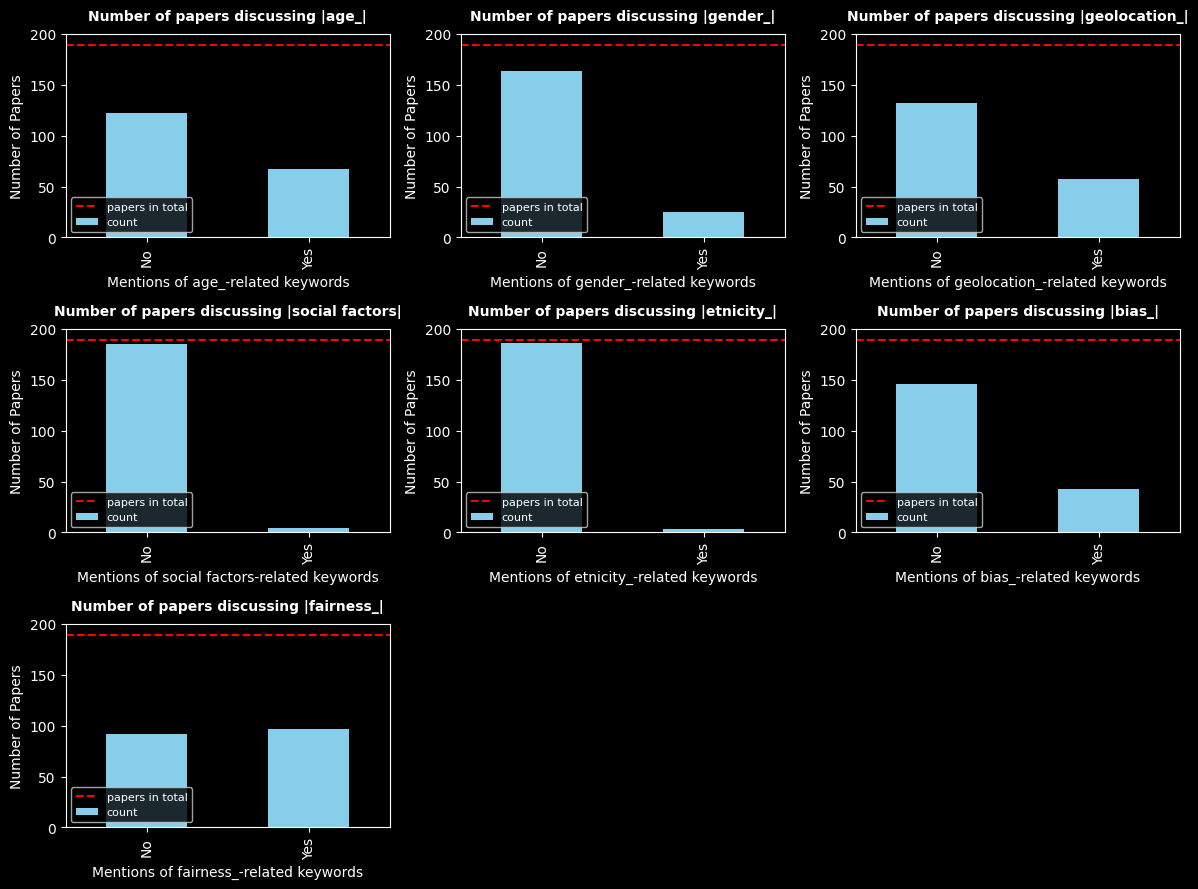

In [12]:
subplot_categories_binary(categories_to_plot, binary_df)

In [28]:
def plot_category_percentage_binary(df):    
    # Drop non-category columns
    df_categories = df.drop(['title'], axis=1)

    # Calculate the sum for each category
    category_sums = df_categories.sum()

    # Calculate the percentage for each category
    total_papers = len(df)  # The total number of papers
    category_percentages = (category_sums / total_papers) * 100

    # Create a bar plot with percentage values
    category_percentages.plot(kind='bar', stacked=False, color='skyblue').set_ylim(0, 100) # Set the y-axis limits to 0-100
    plt.title('Category Distribution in Selected Papers', fontsize=12, fontweight='bold', color='white', loc='center', pad=10, weight='bold',
              backgroundcolor='black', ha='center')
    plt.ylabel('Percentage in Total')
    plt.show()

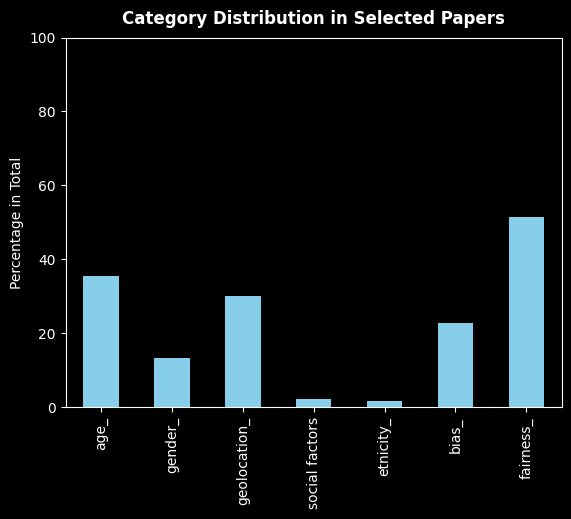

In [29]:
plot_category_percentage_binary(binary_df)

In [30]:
def plot_category_percentage_counts(df):    
    # Drop non-category columns
    xlabels = list(agg_counts_df.columns[1:])
    category_sums = df.sum()[1:]
    total_counts = category_sums.sum()

    category_percentages = []    
    total_word_count = total_counts
    for cat in category_sums:
        percentages = (cat / total_word_count) * 100
        category_percentages.append(percentages)
    
    print(category_percentages)

    # Create a bar plot with percentage values
    plt.bar(xlabels,category_percentages)
    plt.xticks(rotation=60)
    plt.ylim(0, 100) # Set the y-axis limits to 0-100
    plt.title('Keyword counts', fontsize=12, fontweight='bold', color='white', loc='center', pad=10, weight='bold',
              backgroundcolor='black', ha='center')
    plt.ylabel('Percentage in Total')
    plt.show()

[11.391492429704398, 5.912040374909877, 10.88680605623648, 0.2883922134102379, 2.451333813987022, 17.159336697909154, 51.91059841384282]


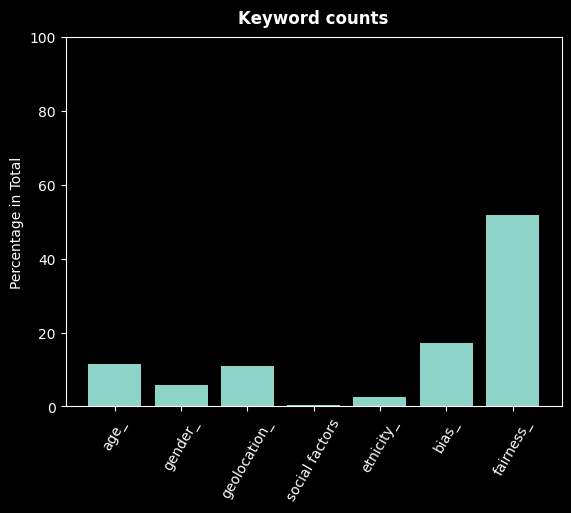

In [31]:
plot_category_percentage_counts(agg_counts_df)